In [1]:
import os

os.environ['DATA_DIR'] = '/home/arco/Downloads/Master AI/CEConvDL2'
os.environ['WANDB_DIR'] = '/home/arco/anaconda3/envs/CEConv3.10/lib/python3.10/site-packages/'
os.environ['OUT_DIR'] = '/home/arco/Downloads/Master AI/CEConv/output'

!python -m experiments.color_mnist.colormnist_longtailed

for i in range(1, 11):
    !python -m experiments.color_mnist.train_longtailed --rotations 1 --planes 20 --grayscale --seed {i}
    !python -m experiments.color_mnist.train_longtailed --rotations 3 --planes 17 --separable --seed {i}

Generated ColorMNIST - longtailed dataset at /home/arco/Downloads/Master AI/CEConvDL2/colormnist_longtailed
Global seed set to 1
train: (tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), tensor([ 26, 105, 103,  77,   1,  44,   6,  17,  38,   1,   2,  50,  67,  88,
         65,   1,   1,  58,   2,   2,  90, 127,  22,   1,  63,  15,  33,  84,
         12,  15]))
test: (tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), tensor([250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250]))
Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [2, 30]                   --
├─Conv2d: 1-1                            [2, 20, 26, 26]           560
├─BatchNorm2

In [4]:
from experiments.color_mnist.train_longtailed import PL_model, CustomDataset
import torch
from argparse import Namespace
import matplotlib.pyplot as plt
import os

Best epoch: 249
Overall accuracy: 0.2642666697502136
Class accuracy: [0.068 0.592 0.284 0.552 0.    0.336 0.    0.048 0.604 0.    0.    0.72
 0.18  0.412 0.168 0.    0.    0.792 0.    0.    0.876 0.816 0.    0.
 0.504 0.036 0.2   0.74  0.    0.   ]
Best epoch: 899
Overall accuracy: 0.8590666651725769
Class accuracy: [0.972 0.992 0.976 0.988 0.96  0.984 0.836 0.936 0.96  0.62  0.824 0.972
 0.94  0.984 0.968 0.068 0.444 0.98  0.82  0.792 0.988 0.948 0.924 0.424
 0.936 0.88  0.936 0.952 0.872 0.896]


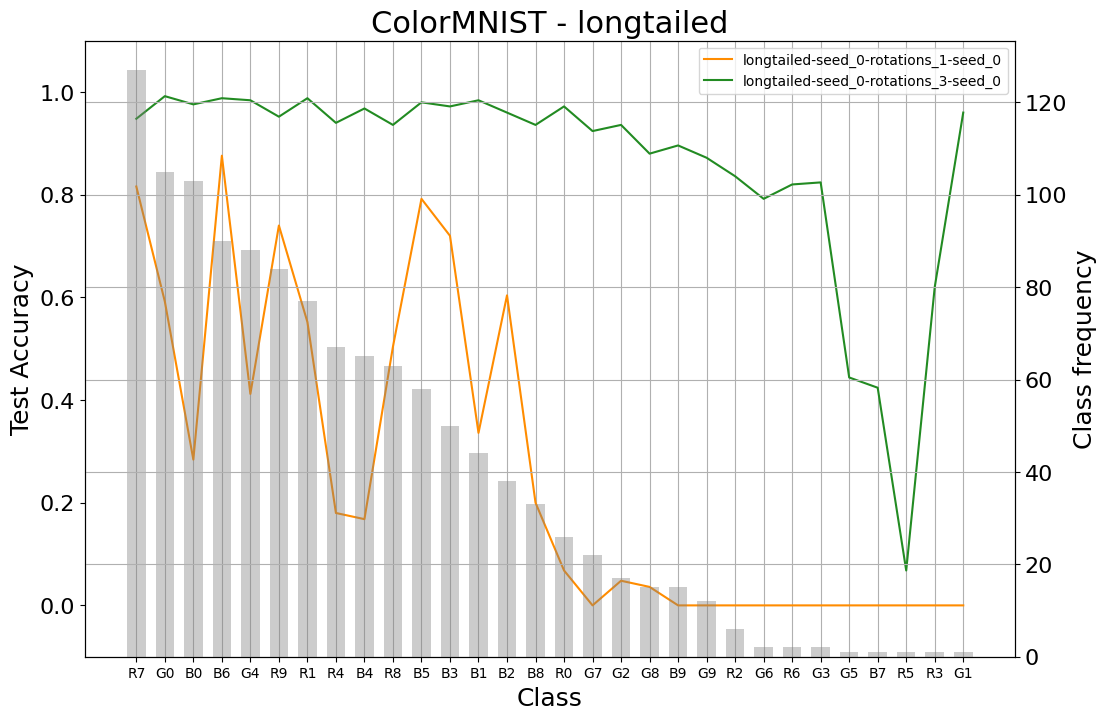

In [5]:
def plot(data_dir):
    # List of model namespaces
    models = [
        Namespace(bs=256, 
                  test_bs=256, 
                  grayscale=True, 
                  jitter=0.0, 
                  epochs=1000, 
                  seed=0, 
                  planes=20, 
                  lr=0.001, 
                  wd=1e-05, 
                  rotations=1, 
                  groupcosetpool=False, 
                  separable=False, 
                  ce_layers=7, 
                  steps_per_epoch=5, 
                  model_name='longtailed-seed_0-rotations_1'),
        Namespace(bs=256, 
                  test_bs=256, 
                  grayscale=False, 
                  jitter=0.0, 
                  epochs=1000, 
                  seed=0, 
                  planes=17, 
                  lr=0.001, 
                  wd=1e-05, 
                  rotations=3, 
                  groupcosetpool=False, 
                  separable=True, 
                  ce_layers=7, 
                  steps_per_epoch=5, 
                  model_name='longtailed-seed_0-rotations_3')
    ]
    
    
    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Loop over models
    for (model_args,color) in zip(models, ['darkorange', 'forestgreen']):
        model = PL_model(model_args)

        model.load_model()
        
        print("Best epoch:", model.best_epoch)
        print("Overall accuracy:", model.best_val_acc.item())
        print("Class accuracy:", model.class_acc)

        train = CustomDataset(
            torch.load(os.path.join(data_dir, "colormnist_longtailed", "train.pt")),
            jitter=model_args.jitter,
            grayscale=model_args.grayscale,
        )

        samples_per_class = torch.unique(train.tensors[1], return_counts=True)
        sort_idx = torch.argsort(samples_per_class[1], descending=True)
        samples_per_class = (samples_per_class[0][sort_idx], samples_per_class[1][sort_idx])

        labels = [j + str(i) for i in range(10) for j in ["R", "G", "B"]]
        labels = [labels[i] for i in sort_idx.numpy()]

        # Plot accuracy per class
        ax1.plot(labels, model.class_acc[sort_idx], label=model_args.model_name, color=color)

    # Plot samples per class
    ax1.grid(axis='both')
    ax2 = ax1.twinx()
    ax2.grid(axis='both')

    ax2.bar(labels, samples_per_class[1].numpy(), color="gray", alpha=0.4, width=0.65)
    ax2.set_ylabel('Class frequency', fontsize=18)

    ax1.set_xlabel('Class', fontsize=18)
    ax1.set_ylabel('Test Accuracy', fontsize=18)
    ax1.set_ylim(-0.1, 1.1)
    ax1.grid(axis='y')
    ax1.legend()

    # Set font size for x-axis ticks
    plt.xticks(rotation=45, fontsize=20)

    # Set font size for y-axis ticks
    ax1.tick_params(axis='y', labelsize=16)
    ax2.tick_params(axis='y', labelsize=16)

    plt.title('ColorMNIST - longtailed', fontsize=22)

    plt.show()

plot("/home/arco/Downloads/Master AI/CEConvDL2")


In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from argparse import Namespace

def plot(data_dir):
    # List of model namespaces
    models = [
        Namespace(bs=256, 
                  test_bs=256, 
                  grayscale=True, 
                  jitter=0.0, 
                  epochs=1000, 
                  seed=0, 
                  planes=20, 
                  lr=0.001, 
                  wd=1e-05, 
                  rotations=1, 
                  groupcosetpool=False, 
                  separable=False, 
                  ce_layers=7, 
                  steps_per_epoch=5, 
                  model_name='longtailed-seed_0-rotations_1'),
        Namespace(bs=256, 
                  test_bs=256, 
                  grayscale=False, 
                  jitter=0.0, 
                  epochs=1000, 
                  seed=0, 
                  planes=17, 
                  lr=0.001, 
                  wd=1e-05, 
                  rotations=3, 
                  groupcosetpool=False, 
                  separable=True, 
                  ce_layers=7, 
                  steps_per_epoch=5, 
                  model_name='longtailed-seed_0-rotations_3')
    ]

    # Create empty arrays to store accuracy scores for each seed
    class_accs = []
    
    # Loop over seeds 1 to 10
    for seed in range(1, 11):
        # Loop over models
        for model_args in models:
            # Update the seed value
            model_args.seed = seed

            # Load the model
            model = PL_model(model_args)
            model.load_model()

            # Append class accuracy to class_accs
            class_accs.append(model.class_acc)

    # Compute the average class accuracy and standard deviation
    avg_class_acc = np.mean(class_accs, axis=0)
    std_dev = np.std(class_accs, axis=0)

    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plot average accuracy with standard deviation as error bars
    ax1.errorbar(labels, avg_class_acc, yerr=std_dev, label='Average', color='blue', capsize=5)

    # Plot samples per class
    ax1.grid(axis='both')
    ax2 = ax1.twinx()
    ax2.grid(axis='both')
    ax2.bar(labels, samples_per_class[1].numpy(), color="gray", alpha=0.4, width=0.65)
    ax2.set_ylabel('Class frequency', fontsize=18)

    ax1.set_xlabel('Class', fontsize=18)
    ax1.set_ylabel('Test Accuracy', fontsize=18)
    ax1.set_ylim(-0.1, 1.1)
    ax1.grid(axis='y')
    ax1.legend()

    # Set font size for x-axis ticks
    plt.xticks(rotation=45, fontsize=20)

    # Set font size for y-axis ticks
    ax1.tick_params(axis='y', labelsize=16)
    ax2.tick_params(axis='y', labelsize=16)

    plt.title('ColorMNIST - longtailed', fontsize=22)

    plt.show()

plot("/home/arco/Downloads/Master AI/CEConvDL2")
